In [2]:
# menghubungkan colab ke gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/ML_praktikum/praktikumreview7'

In [4]:
import pandas as pd

# membaca file csv menggunakan pandas
df = pd.read_csv(path + '/data/apples_and_oranges.csv')

#cetak header data (5 baris data) dari file
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [7]:
# Cek nilai pada kolom Species
df['Class'].unique()

array(['orange', 'apple'], dtype=object)

In [8]:
# Menghitung jumlah pada kolom Species
df['Class'].value_counts()

,count
Class,
orange,20
apple,20


In [9]:
X = df[['Weight', 'Size']]

# Kolom terget (label)
y = df['Class']

In [10]:
y.head()

,Class
0,orange
1,orange
2,orange
3,apple
4,orange


In [11]:
# Split dan Bangun Model SVM

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Membuat model SVM dengan karnel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
# Evaluasi Akurasi dan Report Klasifikasi

y_pred = model.predict(X_test)
# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
# Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




Confusion Matrix:
 [[3 0]
 [0 5]]


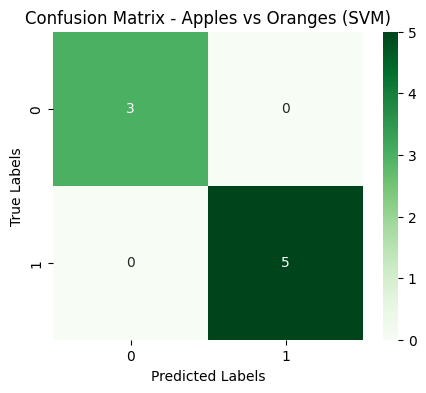

In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Apples vs Oranges (SVM)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

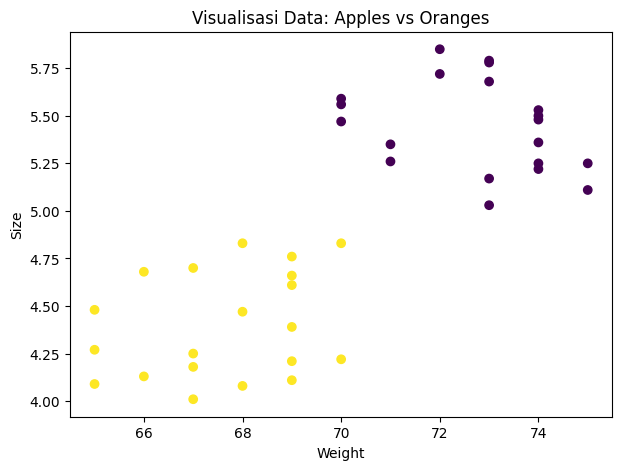

In [14]:
# Visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df['Weight'], df['Size'], c=df['Class'].astype('category').cat.codes)
plt.title("Visualisasi Data: Apples vs Oranges")
plt.xlabel("Weight")
plt.ylabel("Size")
plt.show()

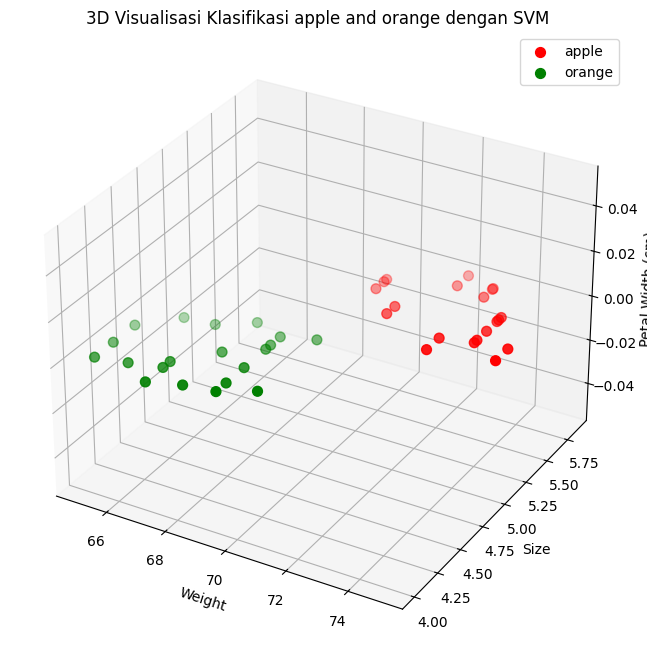

In [15]:
# 3D Visualisasi Hasil Model SVM

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Class'])

# Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

# plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
    subnet = df[df['SpeciesEncoded'] == i]
    ax.scatter(
        subnet['Weight'],
        subnet['Size'],
        color=colors[i],
        label=species,
        s=50
    )

ax.set_xlabel('Weight')
ax.set_ylabel('Size')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Visualisasi Klasifikasi apple and orange dengan SVM')
ax.legend()
plt.show()